In [88]:
import numpy as np
import astropy 
import h5py
from astropy.io import fits
from astrodendro import Dendrogram, pp_catalog
from astropy import units as u
from astrodendro.analysis import PPStatistic
from matplotlib import pyplot as plt
import aplpy

In [2]:
d1 = Dendrogram.load_from('/home/student04/Newrepos/NGC1333_dendrogram.fits')
d2 = Dendrogram.load_from('/home/student04/Newrepos/B1_dendrogram.fits')
d3 = Dendrogram.load_from('/home/student04/Newrepos/L1455_dendrogram.fits')
d4 = Dendrogram.load_from('/home/student04/Newrepos/moment0_Dendrograms/L1451_dendrogram.fits')
d5 = Dendrogram.load_from('/home/student04/Newrepos/moment0_Dendrograms/IC348_dendrogram.fits')

In [3]:
#Converting the spatial axis and beam size into arcsecs
spatial_axis = (0.0024440485689343*u.deg).to(u.arcsec)
bmaj = (0.008554169991270138*u.deg).to(u.arcsec)
bmin = (0.008554169991270138*u.deg).to(u.arcsec)
metadata={}
metadata['data_unit']= u.Jy
metadata['spatial_scale']= spatial_axis
metadata['beam_major']= bmaj
metadata['beam_minor']= bmin


In [7]:
cat1 = pp_catalog(d1,metadata)
cat2 = pp_catalog(d2,metadata)
cat3 = pp_catalog(d3,metadata)
cat4 = pp_catalog(d4,metadata)
cat5 = pp_catalog(d5,metadata)

Computing catalog for 72 structures

[>                                        ] 1%
[=>                                       ] 2%
[=>                                       ] 4%
[==>                                      ] 5%
[==>                                      ] 6%
[===>                                     ] 8%
[===>                                     ] 9%
[====>                                    ] 11%
[=====>                                   ] 12%
[=====>                                   ] 13%
[======>                                  ] 15%
[======>                                  ] 16%
[=======>                                 ] 18%
[=======>                                 ] 19%
[========>                                ] 20%
[========>                                ] 22%
[=========>                               ] 23%
[==========>                              ] 25%
[==========>                              ] 26%
[===========>                             ] 27%
[=========


[================>                        ] 41%
[=================>                       ] 43%
[=================>                       ] 44%
[==================>                      ] 45%
[==================>                      ] 47%
[===================>                     ] 48%
[===================>                     ] 49%
[====================>                    ] 51%
[=====================>                   ] 52%
[=====================>                   ] 54%
[======================>                  ] 55%
[======================>                  ] 56%
[=======================>                 ] 58%
[=======================>                 ] 59%
[========================>                ] 61%
[========================>                ] 62%
[=========================>               ] 63%
[==========================>              ] 65%
[==========================>              ] 66%
[===========================>             ] 68%
[===========================>          


[================================>        ] 80%
[=================================>       ] 83%
[==================================>      ] 86%
[===================================>     ] 88%
[====================================>    ] 91%
[=====================================>   ] 94%
[======================================>  ] 97%
[=======================================> ] 99%
[========================================>] 100%
Computing catalog for 25 structures

[=>                                       ] 4%
[===>                                     ] 8%
[====>                                    ] 12%
[======>                                  ] 16%
[========>                                ] 20%
[=========>                               ] 24%
[===========>                             ] 28%
[============>                            ] 32%
[==============>                          ] 36%
[================>                        ] 40%
[=================>                       ] 44%
[==


Computing catalog for 8 structures

[=====>                                   ] 12%
[==========>                              ] 25%
[===============>                         ] 37%
[====================>                    ] 50%
[=========================>               ] 62%
[==============================>          ] 75%
[===================================>     ] 87%
[========================================>] 100%
[========================================>] 100%
Computing catalog for 25 structures

[=>                                       ] 4%
[===>                                     ] 8%
[====>                                    ] 12%
[======>                                  ] 16%
[========>                                ] 20%
[=========>                               ] 24%
[===========>                             ] 28%
[============>                            ] 32%
[==============>                          ] 36%
[================>                        ] 40%
[=============

# Histogram

In [24]:
def position_angle(d):
    x = len(d)
    angle = []
    for i in range(x):
        if d[i].is_leaf:
            s = d[i]
            stat = PPStatistic(s,metadata=metadata)
            a = stat.position_angle/(1*u.deg)
            if a<0:
                angle.append(a+180)
            else:
                angle.append(a)
    position_angle_leaf = np.array(angle)
    return position_angle_leaf
        

In [25]:
position_angle_d1 = position_angle(d1)
position_angle_d2 = position_angle(d2)
position_angle_d3 = position_angle(d3)
position_angle_d4 = position_angle(d4)
position_angle_d5 = position_angle(d5)

Text(0.5, 1.0, 'Histogram of Position Angle Over Different Perseus Regions')

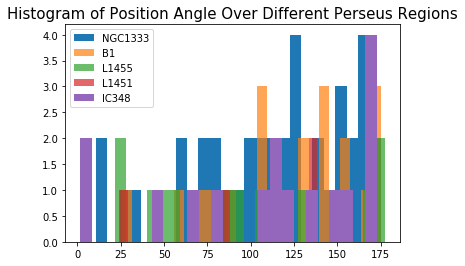

In [55]:
plt.hist(position_angle_d1,bins=25,alpha=1.0,label='NGC1333')
plt.hist(position_angle_d2,bins=25,alpha=0.7,label='B1')
plt.hist(position_angle_d3,bins=25,alpha=0.7,label='L1455')
plt.hist(position_angle_d4,bins=25,alpha=0.7,label='L1451')
plt.hist(position_angle_d5,bins=25,alpha=1.0,label='IC348')
plt.legend()
plt.title('Histogram of Position Angle Over Different Perseus Regions',fontsize=15)

# Scatterplot

In [56]:
def elongation(d):
    x = len(d)
    elongation = []
    for i in range(x):
        if d[i].is_leaf:
            s = d[i]
            stat = PPStatistic(s,metadata=metadata)
            elongation.append(stat.major_sigma/stat.minor_sigma)
    elongation_leaf = np.array(elongation)
    return elongation_leaf

In [57]:
elongation_d1 = elongation(d1)
elongation_d2 = elongation(d2)
elongation_d3 = elongation(d3)
elongation_d4 = elongation(d4)
elongation_d5 = elongation(d5)

In [65]:
def area(d):
    x = len(d)
    area = []
    for i in range(x):
        if d[i].is_leaf:
            s = d[i]
            stat = PPStatistic(s,metadata=metadata)
            area.append(stat.area_exact/(u.arcsec)**2)
    area_leaf = np.array(area)
    return area_leaf

In [66]:
area_d1 = area(d1)
area_d2 = area(d2)
area_d3 = area(d3)
area_d4 = area(d4)
area_d5 = area(d5)

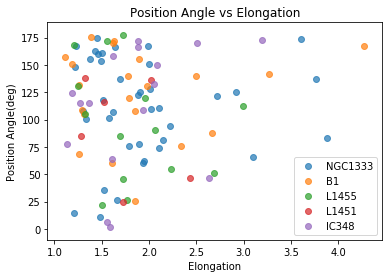

In [62]:
plt.scatter(elongation_d1,position_angle_d1,alpha=0.7,label='NGC1333')
plt.scatter(elongation_d2,position_angle_d2,alpha=0.7,label='B1')
plt.scatter(elongation_d3,position_angle_d3,alpha=0.7,label='L1455')
plt.scatter(elongation_d4,position_angle_d4,alpha=0.7,label='L1451')
plt.scatter(elongation_d5,position_angle_d5,alpha=0.7,label='IC348')
plt.ylabel('Position Angle(deg)')
plt.xlabel('Elongation')
plt.title('Position Angle vs Elongation')
plt.legend()

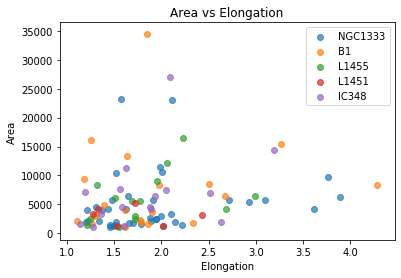

In [68]:
plt.scatter(elongation_d1,area_d1,alpha=0.7,label='NGC1333')
plt.scatter(elongation_d2,area_d2,alpha=0.7,label='B1')
plt.scatter(elongation_d3,area_d3,alpha=0.7,label='L1455')
plt.scatter(elongation_d4,area_d4,alpha=0.7,label='L1451')
plt.scatter(elongation_d5,area_d5,alpha=0.7,label='IC348')
plt.ylabel('Area')
plt.xlabel('Elongation')
plt.title('Area vs Elongation')
plt.legend()

INFO: Auto-setting vmin to -8.659e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.612e+00 [aplpy.core]


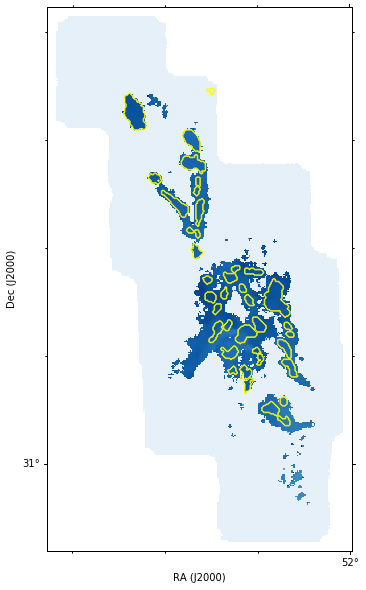

In [93]:
V_d1 = fits.open('/home/student04/Downloads/parameter_maps/Vlsr/NGC1333_NH3_Vlsr_all_rebase3_masked.fits')[0]
mask = np.zeros(hdu.data.shape,dtype=bool)
for leaf in d1.leaves:
    mask = mask | leaf.get_mask()
mask_d1 = fits.PrimaryHDU(mask.astype('short'), V_d1.header)
fig = aplpy.FITSFigure(V_d1, figsize=(12, 10))
fig.show_colorscale(cmap='Blues')
fig.show_contour(mask_d1, colors='yellow', linewidths=0.5)
fig.tick_labels.set_xformat('dd')
fig.tick_labels.set_yformat('dd')